Business Problem

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [2]:
path = r"Downloads/student_info.csv"
df = pd.read_csv(path) #df is called data frame but here it's just a variable ofcourse haha

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

In [6]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


Discover and Visualize the data to gain insight

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
#Information of Numerical Values in Our Data
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Student Study Hours vs Students Marks')

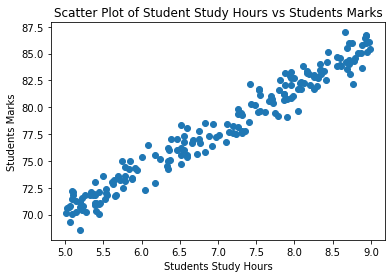

In [55]:
#Visualizng our data
plt.scatter(x = df.study_hours, y = df.student_marks)
#Naming the x-axis
plt.xlabel("Students Study Hours")
#Naming the y-axis
plt.ylabel("Students Marks")
#Naming the Scatter File
plt.title("Scatter Plot of Student Study Hours vs Students Marks")

Prepare the data for Machine Learning Algorithm 


In [56]:
#Data Cleaning(beacuse we have missing values of students and if we clean our data properly then machine will be trained properly.)

df.isnull().sum()


study_hours      5
student_marks    0
dtype: int64

In [57]:
#To cover/fill the missing values we will take out the mean!
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [58]:
#To fill the null values with the value we got after taking out the mean
df2 = df.fillna(df.mean())

In [59]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

No Null Values Present 
Data is now Clean and prepared to train Machine Learning Model

But first we need to split the data because as we can see study_hours is independent but study_marks is dependent on study_hours!


In [60]:
#Split dataset
#Capital X = Matrix
X = df2.drop("student_marks", axis = "columns") #on dropping student_marks we get study_hours
#Small y = vector
y = df2.drop("study_hours", axis = "columns") #on dropping study_hours we get student_marks
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


Splitting Data For Training & Testing

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 51) 
# 0.2 = 20% of the data will be used for testing
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


Select a Model and Train it!

y = mx+c
formula of the straight line
We have x and y but not m and c. 
After finding ma nd c we will use Linear Regression Algo.
Fomula of Linear Regression : y = m * x + c


In [62]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Object Created

In [63]:
#training data using fit
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
lr.coef_ # value of m

array([[3.93571802]])

In [65]:
lr.intercept_ # value of c

array([50.44735504])

In [66]:
m = 3.93
c = 50.44
y = m * 4 + c # studying for 4 hours
y

66.16

In [67]:
lr.predict([[4]])[0][0].round(2)

66.19

Now we will gave data for testing Machine earning Model


In [68]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [69]:
#Joining the actual value and predicted value
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_oroginal", "student_marks_predicted"])


,study_hours,student_marks_oroginal,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


Fine-tune your model

In [70]:
lr.score(X_test, y_test)
#It calculates the accuracy

0.9514124242154464

This means our model is 95% acurate.

We can increase accuracy more!

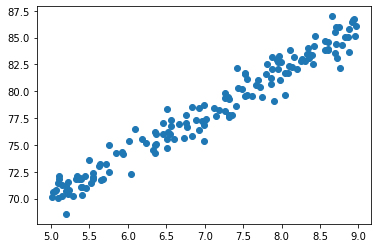

In [71]:
plt.scatter(X_train, y_train)

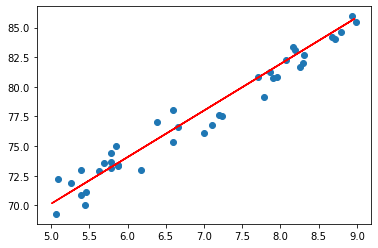

In [76]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

Present your solution

Save ML Model

In [80]:
import joblib
joblib.dump(lr, "Students_mark_predictor_model.pkl")

['Students_mark_predictor_model.pkl']

In [81]:
model = joblib.load("Students_mark_predictor_model.pkl")

In [84]:
model.predict([[5]])[0][0]

70.12594512018406

Launch, Monitor and Maintain your system.

In [ ]:
o